## Studi Kasus Employee Churn

In [141]:
import pandas as pd

In [142]:
df = pd.read_csv('employee_churn.csv')

Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

#### Tempat Mengerjakan:

# 1 - EXPLORATION AND DATA VISUALIZATION

In [143]:
df.iloc[0:50]

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1
5,8637.0,45.40,2.0,masters degree,2.957464,34.646359,-95.066688,1,0
6,10121.0,59.67,5.0,bachelor/diploma,2.166112,48.319347,-79.139183,1,0
7,6416.0,81.34,2.0,bachelor/diploma,3.780238,43.254154,-102.259600,1,0
8,13291.0,69.60,4.0,bachelor/diploma,3.365301,48.415643,-81.382291,1,0
9,11873.0,46.46,4.0,masters degree,3.473618,37.755371,-73.410523,1,0


In [144]:
df.describe()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,overtime_hour,company_latitude,company_longitude,gender,churn
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,10771.866409,52.125208,2.482091,3.080121,41.653243,-87.962635,0.499516,0.299129
std,3810.278239,13.624713,0.877098,0.627240,3.705374,8.250586,0.500242,0.458098
min,583.000000,5.000000,0.000000,1.000000,30.000000,-119.646200,0.000000,0.000000
25%,8202.000000,42.600000,2.000000,2.628310,38.942425,-93.153696,0.000000,0.000000
50%,10530.000000,50.980000,3.000000,3.062020,41.557148,-86.857604,0.000000,0.000000
75%,13185.000000,61.730000,3.000000,3.483906,44.144209,-81.745459,1.000000,1.000000
max,24786.000000,95.700000,5.000000,5.000000,55.140000,-66.385462,1.000000,1.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 72.8+ KB


array([[<AxesSubplot:title={'center':'office_distance_from_house'}>,
        <AxesSubplot:title={'center':'bonus_salary_percentage'}>,
        <AxesSubplot:title={'center':'job_satisfaction'}>],
       [<AxesSubplot:title={'center':'overtime_hour'}>,
        <AxesSubplot:title={'center':'company_latitude'}>,
        <AxesSubplot:title={'center':'company_longitude'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>]],
      dtype=object)

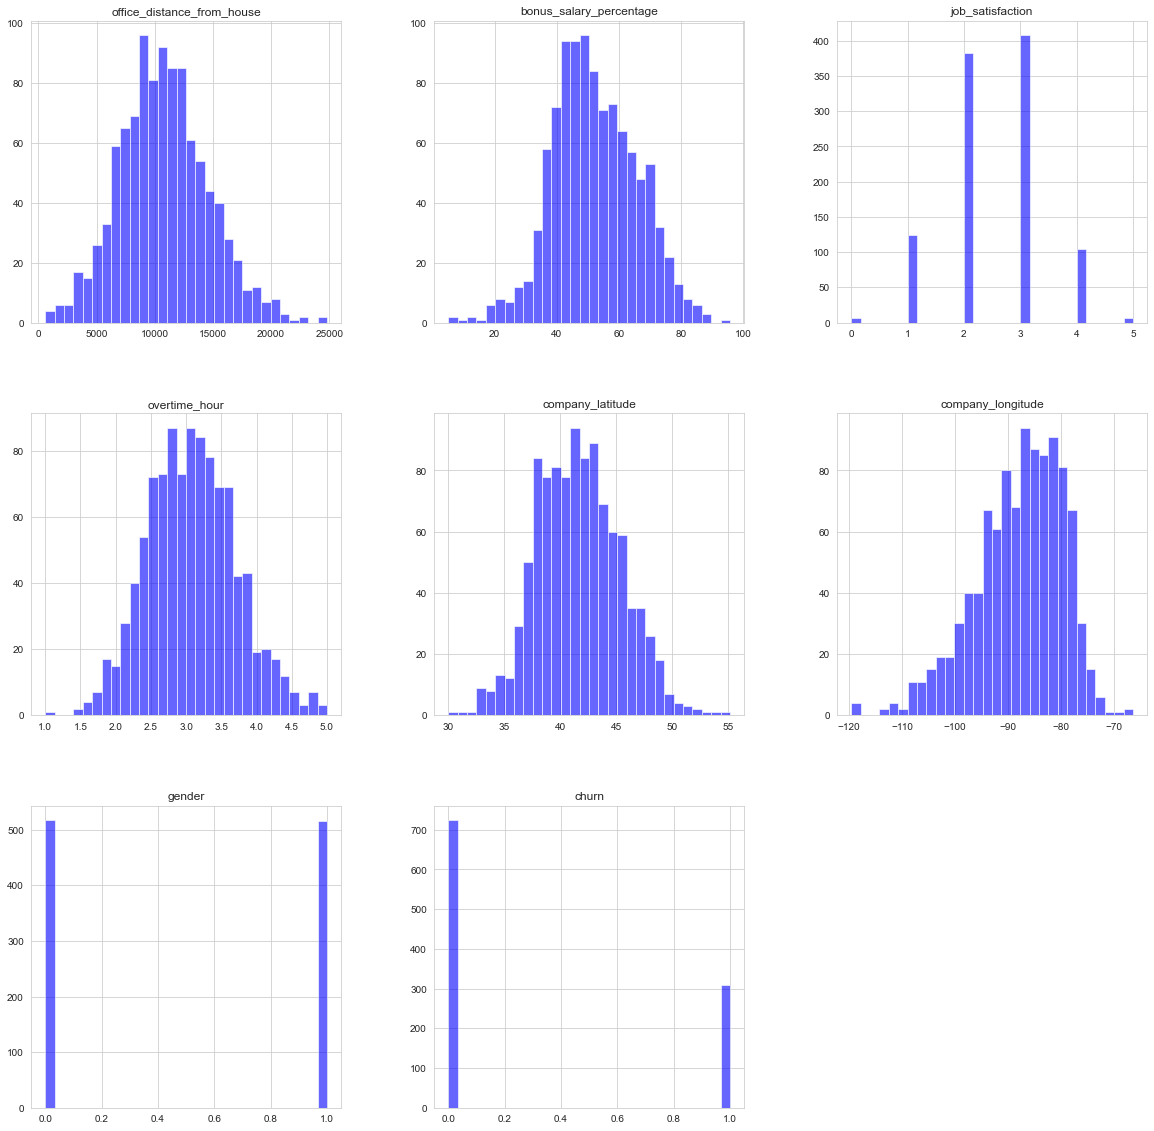

In [146]:
df.hist(bins=30, figsize=(20, 20), color='b', alpha=0.6)

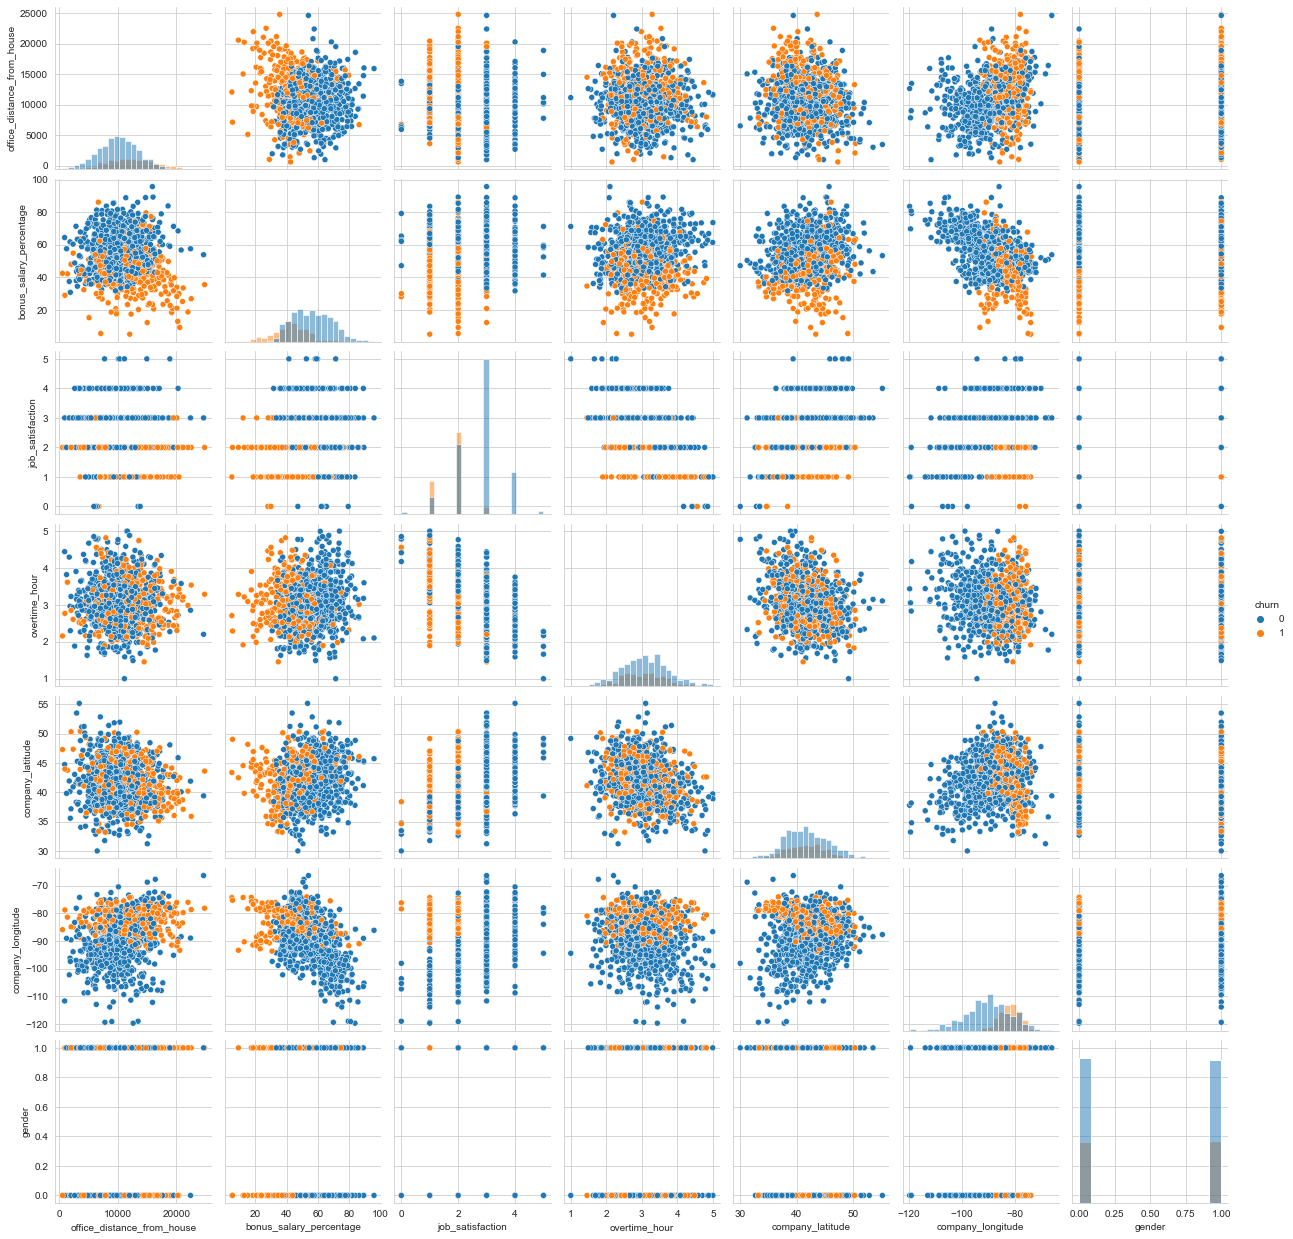

In [147]:
import seaborn as sns
sns.pairplot(df, diag_kind="hist", hue="churn")

# INSIGHTS

In [148]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 1. Persebaran Data Churn

   jumlah sampel  persentase (%)
0            724            70.1
1            309            29.9


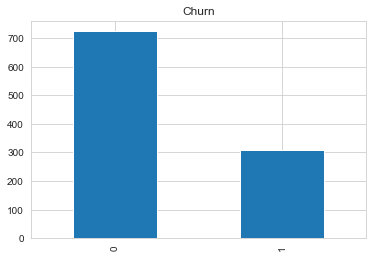

In [149]:
count = df['churn'].value_counts()
percent = 100*df['churn'].value_counts(normalize=True)
churn_df = pd.DataFrame({'jumlah sampel':count, 'persentase (%)':percent.round(1)})
print(churn_df)
count.plot(kind='bar', title='Churn');

### 2. Persebaran Data Edukasi

                  jumlah sampel  persentase (%)
bachelor/diploma            551            53.3
masters degree              463            44.8
higher education             11             1.1
high-school                   8             0.8


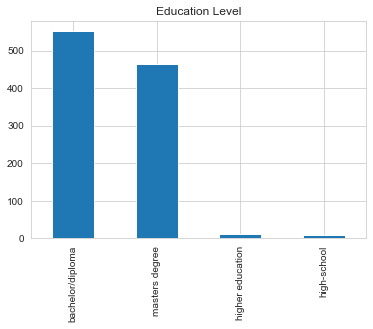

In [150]:
count = df['education_level'].value_counts()
percent = 100*df['education_level'].value_counts(normalize=True)
edu_df = pd.DataFrame({'jumlah sampel':count, 'persentase (%)':percent.round(1)})
print(edu_df)
count.plot(kind='bar', title='Education Level');

### 3. Persebaran Data Gender

   jumlah sampel 0=Perempuan 1=Laki-laki  persentase (%)
0                                    517            50.0
1                                    516            50.0


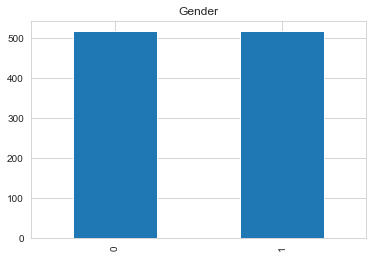

In [151]:
count = df['gender'].value_counts()
percent = 100*df['gender'].value_counts(normalize=True)
gender_df = pd.DataFrame({'jumlah sampel 0=Perempuan 1=Laki-laki':count, 'persentase (%)':percent.round(1)})
print(gender_df)
count.plot(kind='bar', title='Gender');

### 4. Persebaran Data Kepuasan Bekerja

     jumlah sampel  persentase (%)
3.0            408            39.5
2.0            383            37.1
1.0            124            12.0
4.0            105            10.2
0.0              7             0.7
5.0              6             0.6


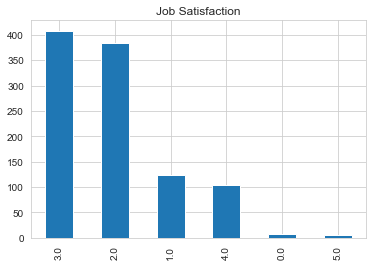

In [152]:
count = df['job_satisfaction'].value_counts()
percent = 100*df['job_satisfaction'].value_counts(normalize=True)
job_df = pd.DataFrame({'jumlah sampel':count, 'persentase (%)':percent.round(1)})
print(job_df)
count.plot(kind='bar', title='Job Satisfaction');

### 5. Insight Persebaran Kordinat dengan yang Keluar dan Masuk

<AxesSubplot:xlabel='company_latitude', ylabel='company_longitude'>

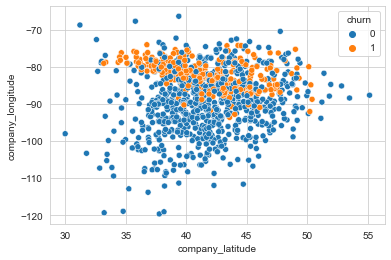

In [153]:
sns.scatterplot(data=df, x="company_latitude", y="company_longitude", hue="churn")

### 6. Semakin Banyak Jam Lembur Orang-orang Semakin Tidak Puas dengan Pekerjaannya

<AxesSubplot:xlabel='bonus_salary_percentage', ylabel='overtime_hour'>

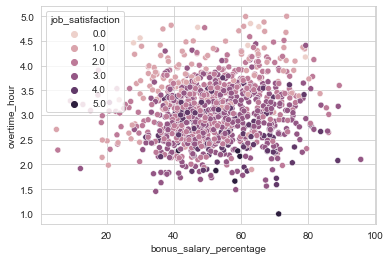

In [154]:
sns.scatterplot(data=df, x="bonus_salary_percentage", y="overtime_hour", hue="job_satisfaction")

### 7. Kebanyakan Bonus yang Rendah Membuat Orang Pindah

<AxesSubplot:xlabel='bonus_salary_percentage', ylabel='churn'>

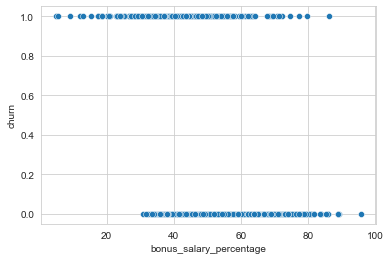

In [155]:
sns.scatterplot(data=df, x="bonus_salary_percentage", y="churn")

### 8. Mereka yang Memiliki Bonus Salary Rendah dan Tidak Senang akan Keluar

<AxesSubplot:xlabel='bonus_salary_percentage', ylabel='job_satisfaction'>

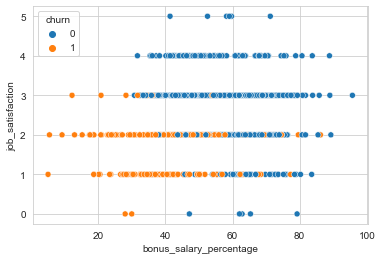

In [156]:
sns.scatterplot(data=df, x="bonus_salary_percentage", y="job_satisfaction", hue='churn')

### 9. Persebaran Data Churn Berdasarkan Gender

Text(0, 0.5, 'Count')

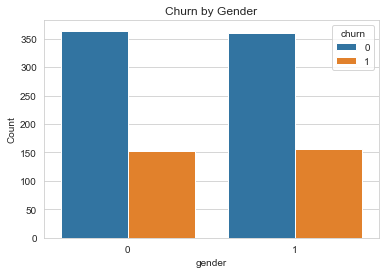

In [157]:
ax1 = sns.countplot('gender', hue='churn',data=df)
ax1.set_title('Churn by Gender')
ax1.set_xlabel('gender')
ax1.set_ylabel('Count')

### 10. Persebaran Data churn Berdasarkan Kepuasan Bekerja

Text(0, 0.5, 'Count')

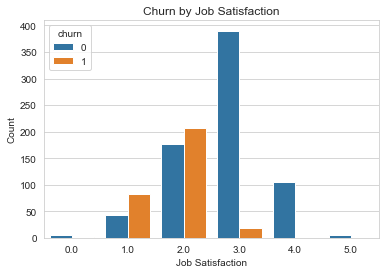

In [158]:
ax2 = sns.countplot('job_satisfaction', hue='churn',data=df)
ax2.set_title('Churn by Job Satisfaction')
ax2.set_xlabel('Job Satisfaction')
ax2.set_ylabel('Count')

### 11. Persebaran Data Churn Berdasarkan Level Edukasi

Text(0, 0.5, 'Count')

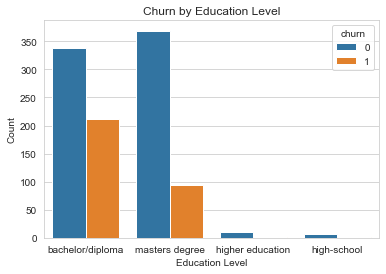

In [159]:
ax3 = sns.countplot('education_level', hue='churn',data=df)
ax3.set_title('Churn by Education Level')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Count')

### 12. Korelasi Antara Semua Variabel

<AxesSubplot:>

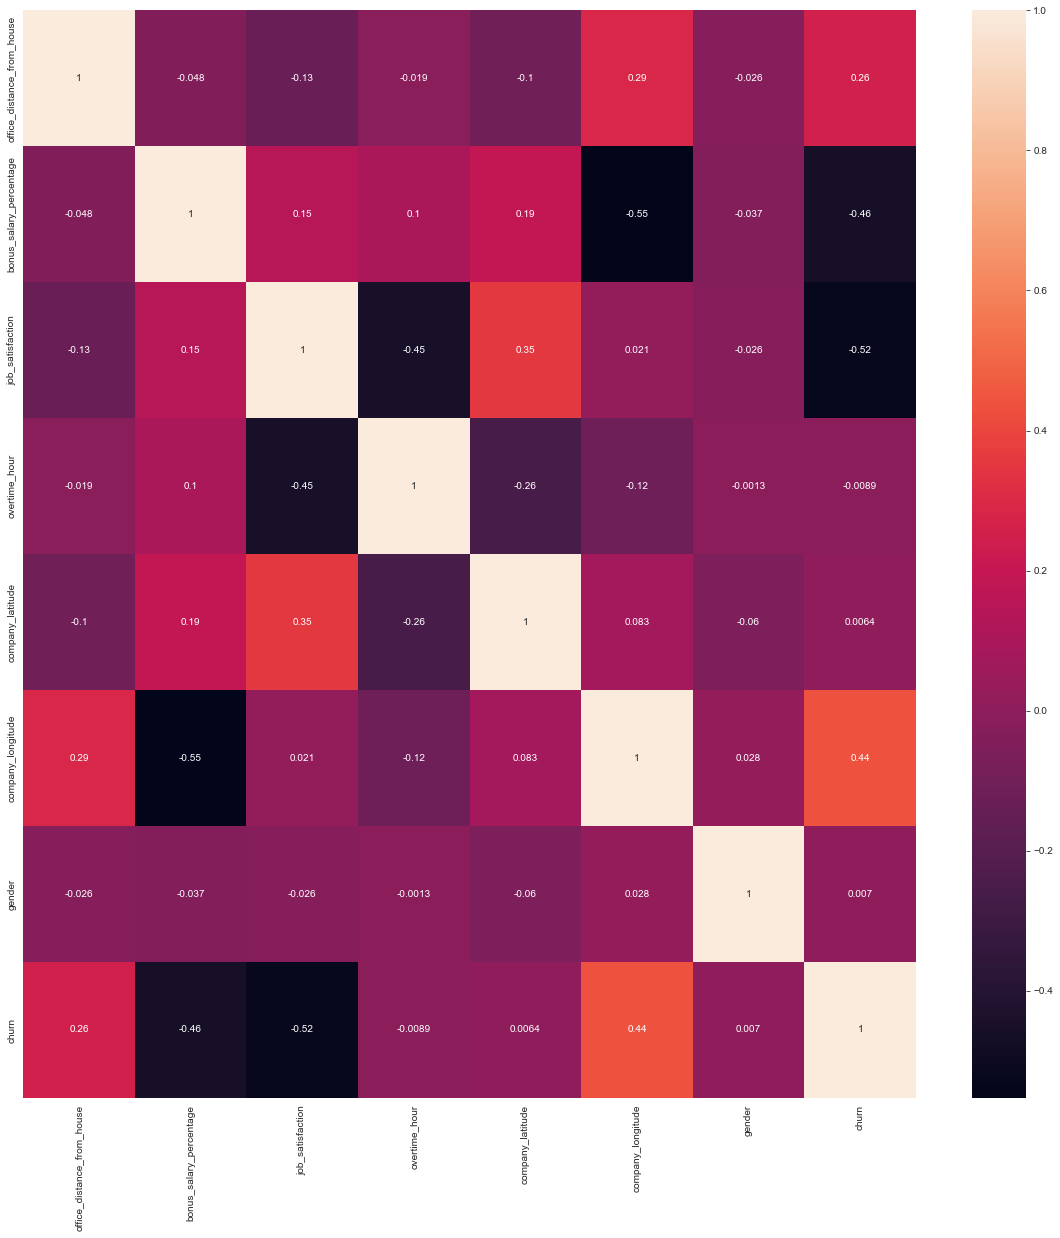

In [160]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

# NO 2 - DATA PREPARATION

In [161]:
df

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1
...,...,...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,bachelor/diploma,2.661765,44.070087,-91.305675,0,0
1029,7881.0,37.09,2.0,masters degree,2.518952,33.188727,-79.078901,0,1
1030,12003.0,66.86,1.0,masters degree,4.882591,39.208364,-93.532059,0,0
1031,9843.0,52.03,2.0,masters degree,3.829853,37.376921,-90.193134,0,0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 72.8+ KB


In [163]:
# handle the categorical variable
# one hot encoding
df = pd.concat([df, pd.get_dummies(df['education_level'], prefix='education_level')],axis=1)
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')],axis=1)
df.drop(['education_level'], axis=1, inplace=True)
df.drop(['gender'], axis=1, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   office_distance_from_house        1033 non-null   float64
 1   bonus_salary_percentage           1033 non-null   float64
 2   job_satisfaction                  1033 non-null   float64
 3   overtime_hour                     1033 non-null   float64
 4   company_latitude                  1033 non-null   float64
 5   company_longitude                 1033 non-null   float64
 6   churn                             1033 non-null   int64  
 7   education_level_bachelor/diploma  1033 non-null   uint8  
 8   education_level_high-school       1033 non-null   uint8  
 9   education_level_higher education  1033 non-null   uint8  
 10  education_level_masters degree    1033 non-null   uint8  
 11  gender_0                          1033 non-null   uint8  
 12  gender

In [165]:
# target column
y = df['churn']

In [166]:
# drop target column from dataframe
df.drop('churn', axis=1, inplace=True)

In [167]:
df

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,overtime_hour,company_latitude,company_longitude,education_level_bachelor/diploma,education_level_high-school,education_level_higher education,education_level_masters degree,gender_0,gender_1
0,8511.0,42.51,1.0,3.416556,33.309014,-93.330348,1,0,0,0,1,0
1,10090.0,57.48,2.0,2.897149,37.678983,-98.968097,1,0,0,0,1,0
2,18652.0,41.22,2.0,3.180264,37.175891,-77.442812,1,0,0,0,0,1
3,13392.0,63.57,3.0,3.429648,44.408084,-85.703296,1,0,0,0,1,0
4,13356.0,46.16,2.0,3.812226,41.454702,-81.404655,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,2.661765,44.070087,-91.305675,1,0,0,0,1,0
1029,7881.0,37.09,2.0,2.518952,33.188727,-79.078901,0,0,0,1,1,0
1030,12003.0,66.86,1.0,4.882591,39.208364,-93.532059,0,0,0,1,1,0
1031,9843.0,52.03,2.0,3.829853,37.376921,-90.193134,0,0,0,1,1,0


In [168]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X

array([[0.3275627 , 0.41356119, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.39280255, 0.5786108 , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.74656034, 0.39933848, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.47184233, 0.68202867, 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.3825972 , 0.5185226 , 0.4       , ..., 1.        , 1.        ,
        0.        ],
       [0.65062182, 0.54366042, 0.6       , ..., 0.        , 0.        ,
        1.        ]])

In [169]:
# split the data to 25/75
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25)

In [170]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (774, 12), Test Data Shape (259, 12)


# 3 & 4 - FALSE POSITIVE AND FALSE NEGATIVE

In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

#### LINEAR SVM

In [172]:
from sklearn import svm

model_linear_svm = svm.SVC(kernel='linear')
model_linear_svm.fit(X_train, y_train)
y_pred_linear_svm = model_linear_svm.predict(X_test)
print(f"Accuracy of Linear SVM: {accuracy_score(y_test, y_pred_linear_svm)}")

Accuracy of Linear SVM: 0.9073359073359073


<AxesSubplot:>

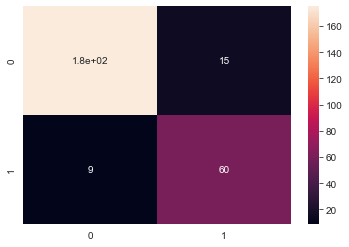

In [173]:
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
sns.heatmap(cm_linear_svm, annot=True)

In [174]:
print(classification_report(y_test, y_pred_linear_svm))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       190
           1       0.80      0.87      0.83        69

    accuracy                           0.91       259
   macro avg       0.88      0.90      0.88       259
weighted avg       0.91      0.91      0.91       259



#### RADICAL SVM


In [175]:
model_radical_svm = svm.SVC(kernel='rbf')
model_radical_svm.fit(X_train, y_train)
y_pred_radical_svm = model_radical_svm.predict(X_test)
print(f"Accuracy of Radical SVM: {accuracy_score(y_test, y_pred_radical_svm)}")

Accuracy of Radical SVM: 0.915057915057915


<AxesSubplot:>

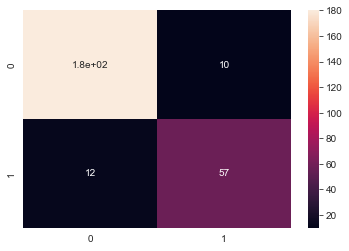

In [176]:
cm_radical_svm = confusion_matrix(y_test, y_pred_radical_svm)
sns.heatmap(cm_radical_svm, annot=True)

In [177]:
print(classification_report(y_test, y_pred_radical_svm))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       190
           1       0.85      0.83      0.84        69

    accuracy                           0.92       259
   macro avg       0.89      0.89      0.89       259
weighted avg       0.91      0.92      0.91       259



#### K-NEAREST NEIGHBORS

In [178]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(f"Accuracy of K-Nearest Neighbors: {accuracy_score(y_test, y_pred_knn)}")

Accuracy of K-Nearest Neighbors: 0.9420849420849421


<AxesSubplot:>

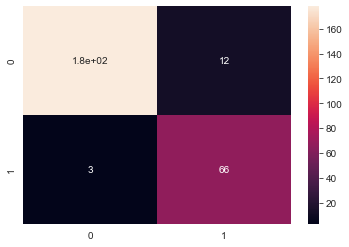

In [179]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True)

In [180]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       190
           1       0.85      0.96      0.90        69

    accuracy                           0.94       259
   macro avg       0.91      0.95      0.93       259
weighted avg       0.95      0.94      0.94       259



#### DECISION TREE

In [181]:
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier()
model_dtree.fit(X_train, y_train)
y_pred_dtree = model_dtree.predict(X_test)
print(f"Accuracy of Decision Tree: {accuracy_score(y_test, y_pred_dtree)}")

Accuracy of Decision Tree: 0.918918918918919


<AxesSubplot:>

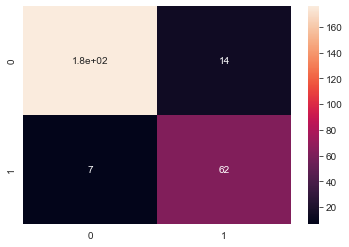

In [182]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm_dtree, annot=True)

In [183]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       190
           1       0.82      0.90      0.86        69

    accuracy                           0.92       259
   macro avg       0.89      0.91      0.90       259
weighted avg       0.92      0.92      0.92       259



#### NAIVE BAYES

In [184]:
from sklearn.naive_bayes import GaussianNB

model_naive_bayes = GaussianNB()
model_naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = model_naive_bayes.predict(X_test)
print(f"Accuracy of Naive Bayes: {accuracy_score(y_test, y_pred_naive_bayes)}")

Accuracy of Naive Bayes: 0.8996138996138996


<AxesSubplot:>

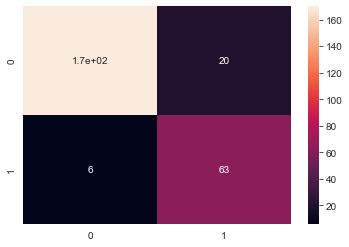

In [185]:
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
sns.heatmap(cm_naive_bayes, annot=True)

In [186]:
print(classification_report(y_test, y_pred_naive_bayes))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       190
           1       0.76      0.91      0.83        69

    accuracy                           0.90       259
   macro avg       0.86      0.90      0.88       259
weighted avg       0.91      0.90      0.90       259



#### RANDOM FOREST CLASSIFIER

In [187]:
from sklearn.ensemble import RandomForestClassifier
model_Ran = RandomForestClassifier()
model_Ran.fit(X_train, y_train)
y_pred_Ran = model_Ran.predict(X_test)
print(f"Accuracy of Randon Forest Model: {accuracy_score(y_test, y_pred_Ran)}")

Accuracy of Randon Forest Model: 0.9420849420849421


<AxesSubplot:>

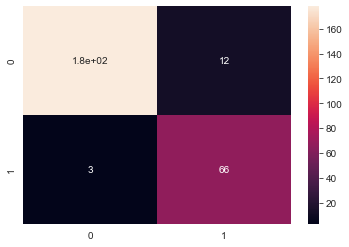

In [188]:
cm_Ran = confusion_matrix(y_test, y_pred_Ran)
sns.heatmap(cm_Ran, annot=True)

In [189]:
print(classification_report(y_test, y_pred_Ran))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       190
           1       0.85      0.96      0.90        69

    accuracy                           0.94       259
   macro avg       0.91      0.95      0.93       259
weighted avg       0.95      0.94      0.94       259



#### XGBOOST

In [190]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)
y_pred_xgboost = model_xgboost.predict(X_test)
print(f"Accuracy of XGBoost: {accuracy_score(y_test, y_pred_xgboost)}")

Accuracy of XGBoost: 0.9498069498069498


<AxesSubplot:>

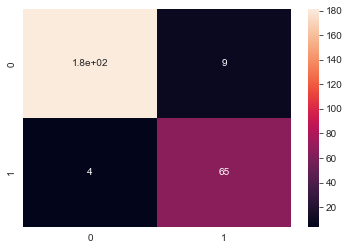

In [191]:
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(cm_xgboost, annot=True)

In [192]:
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       190
           1       0.88      0.94      0.91        69

    accuracy                           0.95       259
   macro avg       0.93      0.95      0.94       259
weighted avg       0.95      0.95      0.95       259



# TRAIN MULTIPLE MODEL WITH CROSS VALIDATION

In [194]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22,shuffle=True)
cv_mean = []
accuracy = []
std = []
y_pred_list = []

classifiers = ['Linear Svm',
              'Radical Svm',
              'KNN',
              'Decision Tree',
              'Naive Bayes',
              'Random Forest',
              'XGBoost']

models = [svm.SVC(kernel='linear'),
         svm.SVC(kernel='rbf'),
         KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(),
          XGBClassifier()
        ]

for i in models:
    model = i 
    cv_result = cross_val_score(model, 
                               X_train, 
                               y_train, 
                               cv=kfold,
                              scoring='accuracy')
    y_pred = cross_val_predict(model, X, y, cv=10)
    y_pred_list.append(y_pred)
    cv_result = cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_model_data_frame = pd.DataFrame({'Cv Mean': cv_mean},
                                   index=classifiers)

new_model_data_frame

,Cv Mean
Linear Svm,0.904346
Radical Svm,0.915984
KNN,0.940543
Decision Tree,0.912138
Naive Bayes,0.821295
Random Forest,0.948268
XGBoost,0.952165


### Jawaban:

#### Nomor 1. (Penjelasan)

Berikut adalah insights yang saya temui:

_info : untuk visualisasi data dapat dilihat bagian insight di jawaban (berurutan)_
1. Persebaran Data edukasi dalam data memiliki hasil presentasi yang variatif untuk data ini yang tingkat bachelor/diploma sebanyak 53%, master degree 44,8%, higher education 1.1% dan highscholl 0.8% (merujuk data insight nomor 1)
2. Persebaran gender memiliki jumlah yang rata, sehingga dapat disimpulkan data ini memiliki gender yang seimbang (merujuk data insight nomor 2)
3. Dalam data tersebut bisa kita kihat kebanyak orang memiliki nilai angka kesenangan pada pekerjaan pada nilai 3, dilanjutkan oleh angka 2, dan seterusnya. sehingga kita dapat membuat kesimpulan kebanyakan di data ini memiliki nilai 3 (merujuk data insight nomor 3)
4. Persebaran data churn pada grafik ememiliki persebaran 70,1% untuk churn 0. sedangkan 29,9 untuk churn 1 (merujuk data insight nomor 4)
5. kebanykan orang memilih untuk tetap ketika kordinat kerja mereka dibawa -90 (longtitude) dan jika longtitud > -90 maka orang orang mayoritas memilih untuk keluar dari pekerjaan mereka (merujuk data insight nomor 5)
6. Semakin banyak nilai lembur orang memiliki nilai kesenangan buruk semakin banyak diikuti dengan nilai bonus. sehingga, dapat disimpulkan orang akan mengalami ketidaksenangan untuk bekerja ketika jam lemburnya dan bonus akan memberikan rating kecil untuk kerjanya (merujuk data insight nomor 6)
7. dapat disipulkan orang yang memiliki presentasi bonus diatas 30% kebnayakan akan tetap di pekerjaannya dan tidak kelar (merujuk data insight nomor 7)
8. Orang ynag memiliki bonus rendah dan tidak senang kebanyakan akan memilih pindah dari pekerjaannya, berbanding terbalik kerika mereka memberi rating bagus di pekerjaannya dan memiliki bonus besar. mereka cenderung akan tetap (merujuk data insight nomor 8)

#### Nomor 2. (Penjelasan)

-	Saya melakukan Teknik one hot encoding pada kolom education level dan gender agar memudahkan data kategorikal untuk dihandle dalam proses pembuatan model nantinya
-	Kemudian dataframe baru hasil encoding digabung dengan dataframe utama
-	Kemudian saya menghapus kolom education_level dan gender dari dataframe karena sudah diencode sehingga dua kolom tersebut sudah tidak diperlukan
-	Kemudian saya membuat kolom churn sebagai kolom target untuk proses training model dan menghapus kolom churn dari dataframe karena sudah tidak diperlukan
-	Kemudian saya melakukan standarisasi data pada dataframe sehingga nilai-nilai pada dataframe tersebut memiliki skala yang sama
-	Kemudian saya membagi dataframe menjadi dua bagian 25/75, 25% untuk data test, dan 75% untuk data train
-	Kemudian data siap digunakan untuk proses training model


#### Nomor 3. (Penjelasan)

- False Positive dari kasus ini adalah ketika hasil aktual adalah karyawan tidak jadi 'churn' sedangkan hasil prediksi adalah karyawan adalah 'churn'
- False Negative dari kasus ini adalah ketika hasil aktual adalah karyawan adalah 'churn' sedangkan hasil prediksi adalah karyawan tidak jadi 'churn'
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah 'False Negative' karena apabila hasil aktual karyawan adalah 'churn' dan dari hasil prediksi adalah tidak 'churn' maka kita tidak akan memperhatikan karyawan tersebut sehingga karyawan tersebut akan 'churn' atau berpindah ke kantor yang lain.
- Dalam kasus ini, tipe 'kesalahan' yang lebih baik kita hindari adalah 'False Positive' karena apabila hasil aktual karyawan adalah tidak 'churn' dan dari hasil prediksi adalah 'churn', kantor akan menghabiskan tenaga dan waktu untuk karyawan yang sebenarnya tidak akan 'churn'.

#### Nomor 4. (Penjelasan)

- Saya menggunakan Machine Learning Model: 'Linear Svm, Radical Svm, KNN, Decision Tree, Naive Bayes, Random Forest, dan XGBoost'
- Untuk mengevaluasi model tersebut, saya menggunakan metrik: Akurasi.
- Hasil evaluasi dari model tersebut adalah sebagai berikut:
    -  Kami mendapati akurasi paling tinggi adalah menggunakan Machine Learning Model: XGBoost
    -  Akurasi: 0.95
    -  Precision: 0 = 0.98, 1 = 0.88
    -  Recall: 0 = 0.95, 1 = 0.94
    -  F-1 Score: 0 = 0.97, 1 = 0.91